In [13]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [6]:
interior=cv2.imread('taller1img/interior.jpg')
sol=cv2.imread('taller1img/sol.jpg')
sombra=cv2.imread('taller1img/sombra.jpg')

In [14]:
interior= cv2.cvtColor(interior, cv2.COLOR_BGR2RGB)
sol= cv2.cvtColor(sol, cv2.COLOR_BGR2RGB)
sombra= cv2.cvtColor(sombra, cv2.COLOR_BGR2RGB)

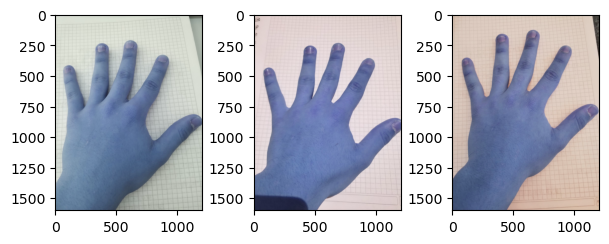

In [15]:
plt.subplot(131), plt.imshow(interior)
plt.subplot(132), plt.imshow(sol)
plt.subplot(133), plt.imshow(sombra)
plt.subplots_adjust(top=0.95, bottom=0.05, left=0.10, right=0.95, hspace=0.25, wspace=0.35)

In [9]:
interiorg= cv2.cvtColor(interior, cv2.COLOR_RGB2GRAY)
solg= cv2.cvtColor(sol, cv2.COLOR_RGB2GRAY)
sombrag= cv2.cvtColor(sombra, cv2.COLOR_RGB2GRAY)

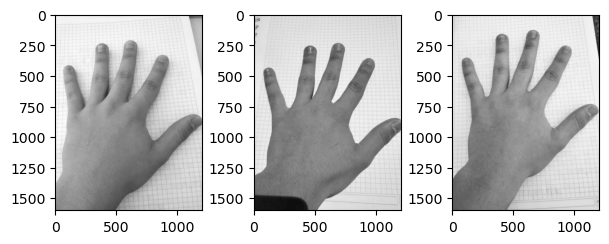

In [10]:
plt.subplot(131), plt.imshow(interiorg,cmap='gray')
plt.subplot(132), plt.imshow(solg,cmap='gray')
plt.subplot(133), plt.imshow(sombrag,cmap='gray')
plt.subplots_adjust(top=0.95, bottom=0.05, left=0.10, right=0.95, hspace=0.25, wspace=0.35)

--------------------------------2 bins--------------------------------
                     SIN NORMALIZAR                      /   NORMALIZADO       
               /int-sol      /int-sombra   /sol-sombra   /int-sol/int-sombra /sol-sombra
Correlacion    /1.00         /1.00         /1.00         /1.00   /1.00       /1.00   
Chi-Cuadrado   /45,520.38    /38,145.03    /209,850.31   /0.00   /0.00       /0.00   
Intersección   /1,798,724.00 /1,809,524.00 /1,681,848.00 /1.00   /1.00       /1.00   
Bhattacharyya  /0.06         /0.05         /0.11         /0.00   /0.00       /0.00   
--------------------------------8 bins--------------------------------
                     SIN NORMALIZAR                      /   NORMALIZADO       
               /int-sol      /int-sombra   /sol-sombra   /int-sol/int-sombra /sol-sombra
Correlacion    /0.90         /0.96         /0.80         /0.90   /0.96       /0.80   
Chi-Cuadrado   /2,020,483.73 /158,671.66   /6,654,054.79 /0.64   /0.20       /14.46  
Inte

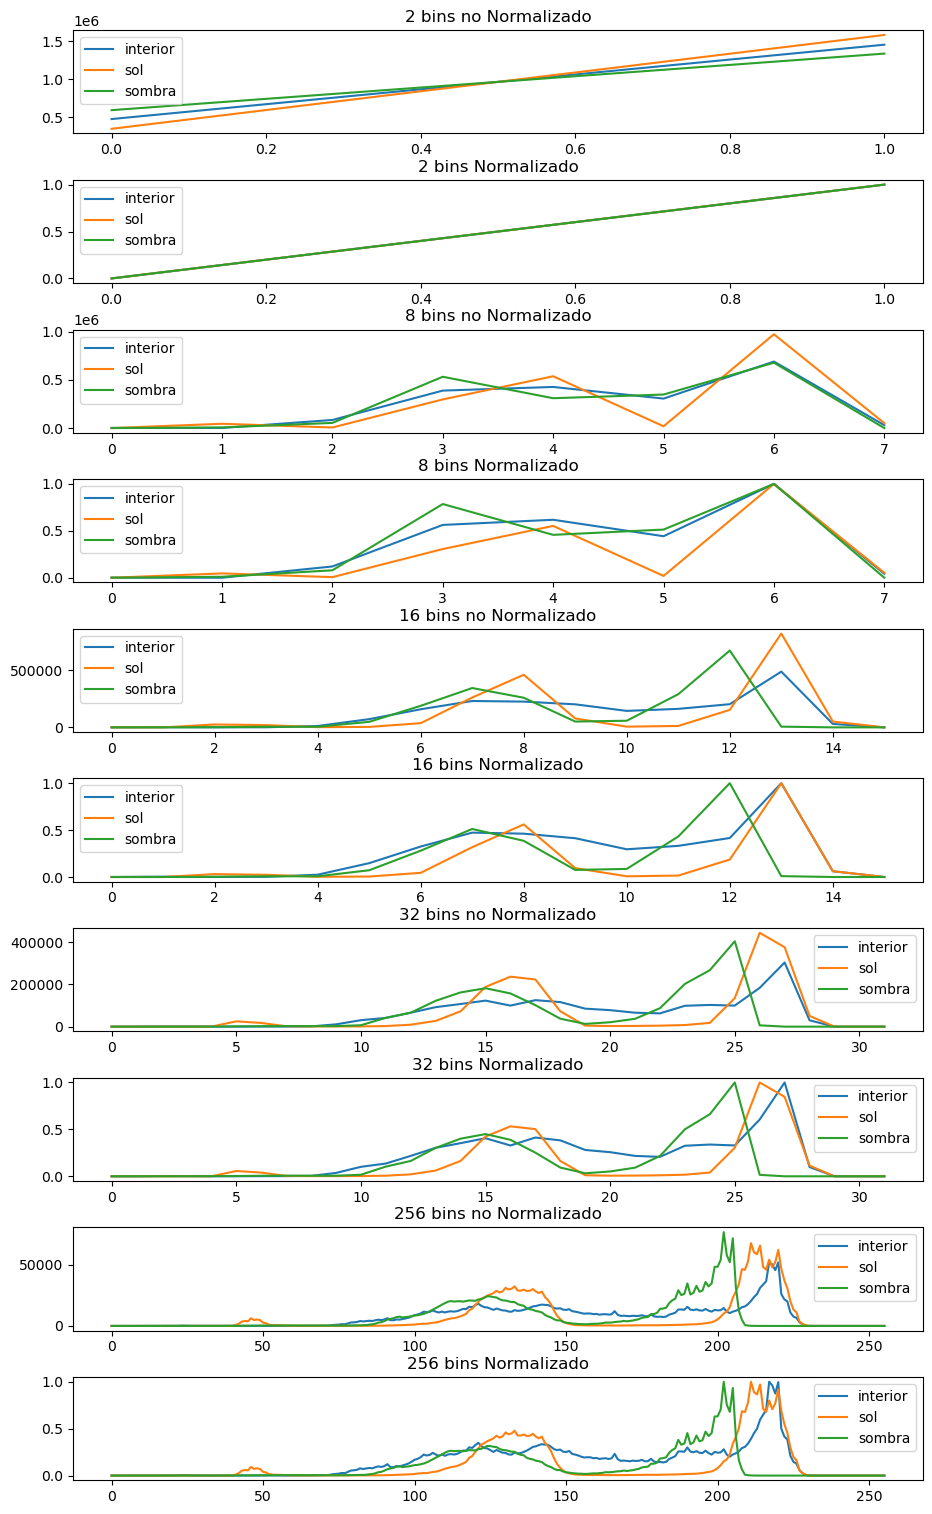

In [11]:
#hist = cv2.calcHist([imggray],[0],None, [16],[0,256])
bins=tuple([2,8,16,32,256])
comparadores=['Correlacion','Chi-Cuadrado','Intersección','Bhattacharyya']
#print(len(interiorg)**2)
nonorm=np.zeros((len(comparadores),3))
norm=np.zeros((len(comparadores),3))
#print(norm)
plt.figure(figsize=(10,10*len(bins)/5))
for i,bin in enumerate(bins):
    histint = cv2.calcHist([interiorg],[0],None, [bin],[0,256])
    histsol = cv2.calcHist([solg],[0],None, [bin],[0,256])
    histsombra = cv2.calcHist([sombrag],[0],None, [bin],[0,256])
    #print("!!!!!!!NO NORMALIZADO!!!!!!!")
    print("--------------------------------{} bins--------------------------------".format(bin))
    for j in range(len(comparadores)):
        #print('***Comparador {}***'.format(comparadores[j]))
        comp=cv2.compareHist(histint,histsol,j)
        nonorm[j][0]=comp
        #print('interior vs sol = {}'.format(comp))
        comp=cv2.compareHist(histint,histsombra,j)
        nonorm[j][1]=comp
        #print('interior vs sombra = {}'.format(comp))
        comp=cv2.compareHist(histsol,histsombra,j)
        nonorm[j][2]=comp
        #print('sol vs sombra = {}'.format(comp))

    plt.subplot(2*len(bins),1,2*i+1)
    plt.title('{} bins no Normalizado'.format(bin))
    plt.plot(histint,label="interior")
    plt.plot(histsol,label="sol")
    plt.plot(histsombra, label="sombra")
    plt.legend()
    #print("!!!!!!!NORMALIZADO!!!!!!!")
    for j in range(len(comparadores)):
        #print('***Comparador {}***'.format(comparadores[j]))
        cv2.normalize(histint, histint, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)
        cv2.normalize(histsol, histsol, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)
        cv2.normalize(histsombra, histsombra, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)
        comp=cv2.compareHist(histint,histsol,j)
        norm[j][0]=comp
        #print('interior vs sol = {}'.format(comp))
        comp=cv2.compareHist(histint,histsombra,j)
        norm[j][1]=comp
        #print('interior vs sombra = {}'.format(comp))
        comp=cv2.compareHist(histsol,histsombra,j)
        norm[j][2]=comp
        #print('sol vs sombra = {}'.format(comp))
    print('{:<57}/{:<21}'.format('                     SIN NORMALIZAR','   NORMALIZADO'))
    print('{:<15}/{:<13}/{:<13}/{:<13}/{:<7}/{:<11}/{:<7}'.format(' ','int-sol','int-sombra','sol-sombra','int-sol','int-sombra','sol-sombra'))
    for j in range(len(comparadores)):
        print('{:<15}/{:<13,.2f}/{:<13,.2f}/{:<13,.2f}/{:<7,.2f}/{:<11,.2f}/{:<7,.2f}'.format(comparadores[j],nonorm[j][0],nonorm[j][1],nonorm[j][2]
                                                                    ,norm[j][0],norm[j][1],norm[j][2]))

    plt.subplot(2*len(bins),1,2*i+2)
    plt.title('{} bins Normalizado'.format(bin))
    plt.plot(histint,label="interior")
    plt.plot(histsol,label="sol")
    plt.plot(histsombra, label="sombra")
    plt.legend()
    #print(i,bin)

#plt.plot(hist)
plt.subplots_adjust(top=1.5, bottom=0.05, left=0.10, right=0.95, hspace=0.45, wspace=0.45)